<a href="https://colab.research.google.com/github/lRAHULl/Deep-Learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
tf.__version__

'1.12.0'

In [4]:
# MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data (i.e) reduce the values between 0 and 1.
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)

11493376/11490434 [==============================] - 1s 0us/step


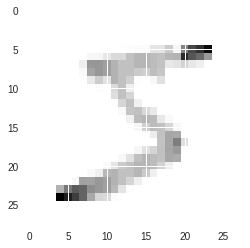

5



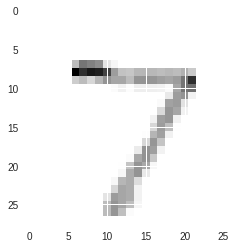

7


In [6]:
# plot the images and print the labels to check them
plt.imshow(X_train[0])
plt.show()
print(y_train[0])
print()
plt.imshow(X_test[0])
plt.show()
print(y_test[0])

In [7]:
# Print the pixels values (input to the neural net must in the form of tensors(n-D arrays))
print(X_train[0])
print(y_train[0])
print()
print()
print()
print(X_test[0])
print(y_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
from keras.models import Sequential
from keras.layers import Dense, ReLU, Softmax, Flatten

# Build the model
model = Sequential()

# The input layer takes the flattened image as input which in our case is (28 * 28 * 1) 
model.add(Flatten())

model.add(Dense(200))
model.add(ReLU())
model.add(Dense(200))
model.add(ReLU())
model.add(Dense(200))
model.add(ReLU())

model.add(Dense(10))
model.add(Softmax())

In [0]:
# Define some parameters for the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Train the model
model.fit(X_train, y_train, epochs = 5);

Epoch 1/5
60000/60000 [==============================] - 12s 193us/step - loss: 0.2332 - acc: 0.9292
Epoch 2/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0954 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0661 - acc: 0.9788
Epoch 4/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0499 - acc: 0.9840
Epoch 5/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0408 - acc: 0.9865


In [11]:
# Compute the validation loss(Test set loss), if there is more deviation in train and validation loss, our model is likely to be overfitting, 
# we must use certain techniques like Dropout or Regularization to reduce overfitting.
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)
# In our case the deviation is only around 1%, so the regularization is not necessary

10000/10000 [==============================] - 1s 63us/step
0.08304182573892176 0.9774


In [0]:
# predict the test set with the model
y_pred = model.predict(X_test)

In [13]:
y_pred # this outputs the probabilities of the labels (in our case: 0 - 9) which are predicted by our model. 

array([[1.10609917e-10, 8.79632864e-08, 1.24274877e-07, ...,
        9.99999285e-01, 7.26679161e-09, 2.50227799e-07],
       [4.61254279e-09, 1.38730616e-06, 9.99998212e-01, ...,
        3.01164079e-07, 3.45096218e-08, 2.22357098e-11],
       [5.22289878e-10, 9.99989152e-01, 1.72057781e-08, ...,
        1.77472515e-07, 9.67513643e-06, 8.01169620e-08],
       ...,
       [5.13315120e-11, 1.59438707e-09, 1.16542373e-10, ...,
        2.22307470e-08, 4.34545129e-08, 1.50293567e-06],
       [3.25596911e-11, 1.34326925e-11, 9.25225841e-16, ...,
        3.04371681e-13, 3.22338394e-07, 2.54148924e-11],
       [7.55317160e-06, 4.66721328e-10, 2.69412159e-10, ...,
        2.99105554e-12, 8.11293503e-08, 2.25236274e-10]], dtype=float32)

In [14]:
# We can check by randomly check the maximum probability in the each array of the prediction
print(np.argmax(y_pred[0]))
print(np.argmax(y_pred[9999]))

7
6


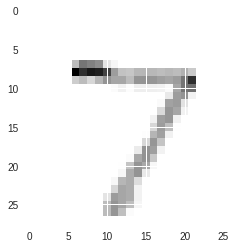

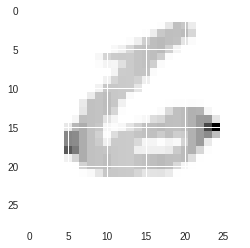

In [15]:
# The originals of the above predicted values
plt.imshow(X_test[0])
plt.show()
plt.imshow(X_test[9999])
plt.show()